<center><font size = "10"> Week 5 - Single Cell Electrophysiology <center>
<center><font size = "8">Home work<center>

# Ex 2. Analysing real single cell voltage traces from patch-clamp experiments

<font size='3'>Find the time to first spike, spikecount and the coefficient of variation of the interspike interval (ISI) from the recordings in your folder group (.dat files). Plot all recordings, then extract the above features from one or several stimulation protocols that you think you can extract the features from using your method of choice - eFEL, scipy.signal or your own custom code. [1.5 pts]

#### Traces description

* The files are named with: stimuli type (e.g. "APWaveform", "FirePattern", "IV"). 
* Sweep (repetition) number: (e.g. "APWaveform_46-51"), of increasing/decreasing amplitudes.
* Note that we have pairs of recordings with the same trace number (e.g. "exp_APWaveform_ch7_51.dat" and "exp_APWaveform_ch6_51.dat"). One of them contains the current stimulus (in this case "*ch7*") and the other the voltage response (in this case "*ch6*").

In [71]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks, peak_prominences
from mpl_toolkits.axes_grid1 import make_axes_locatable
from json2html import *
import IPython

In [72]:
def zip_traces(traces_path):
    """Save traces that are paired in zip format by iterating through the directory's files (.dat)
    then separate ch6 and ch7 to zip them at the end"""
    ch6_list = []
    ch7_list = []
    fileList, _, _ = os.walk(traces_path)
    for filename in fileList[2]:
        if filename.lower().endswith('.dat'):
            trace_name = os.path.basename(filename)
            channel_name = trace_name.rsplit('_', 2)[1]
            if channel_name == 'ch6':
                ch6_list.append(trace_name)
            else:
                ch7_list.append(trace_name)
    return set(zip(ch6_list, ch7_list))

def get_data(fn):
    """Read  data file and formatfor plotting"""
    fn = os.path.join('group1', fn)
    d = np.fromfile(fn)    
    return d[::2], d[1::2]

def plot_traces(fig, paired_traces):
    """Plot all traces by creating subplots and dividing each subplot to 
    voltage and current responses respectively"""
    for idx, trace in enumerate(paired_traces):
        axes = fig.add_subplot(10, 2, idx+1)
        divider = make_axes_locatable(axes)
        ax_voltage = divider.append_axes("top", size="100%", pad=0.1, sharex=axes)
        t, v = get_data(trace[0])
        t, i = get_data(trace[1])
        ax_voltage.plot(t, v)
        ax_voltage.set_ylabel('Voltage (mV)')
        ax_voltage.xaxis.set_tick_params(labelbottom=False)
        axes.plot(t, i, color='red')
        axes.set_ylabel('Current (nA)')
        axes.set_xlabel('Time (msec)')
        ax_voltage.set_title(str(trace[0]))
    fig.tight_layout()
        
def extract_features(paired_traces):
    """Extract the mentioned features (First peak time, spike counts and cv of ISI) 
    from the recordings that have spikes"""
    first_peak_time = []
    spike_counts = []
    cv_isi = []
    idx_selected_rec = []
    for i, trace in enumerate(paired_traces):
        t, v = get_data(trace[0])
        peaks_time, _ = find_peaks(v, prominence=1, height=-20)
        if len(peaks_time) > 1:
            first_peak_time.append((trace[0], peaks_time[0]))
            spike_counts.append((trace[0], len(peaks_time)))
            cv_isi.append((trace[0], np.diff(peaks_time).std()*100/np.diff(peaks_time).mean()))
            idx_selected_rec.append(i)
    return first_peak_time, spike_counts, cv_isi, idx_selected_rec

In [73]:
#Acquire traces and zip the paired ones together (38 pairs)
traces_path = 'group1'
paired_traces = zip_traces(traces_path)

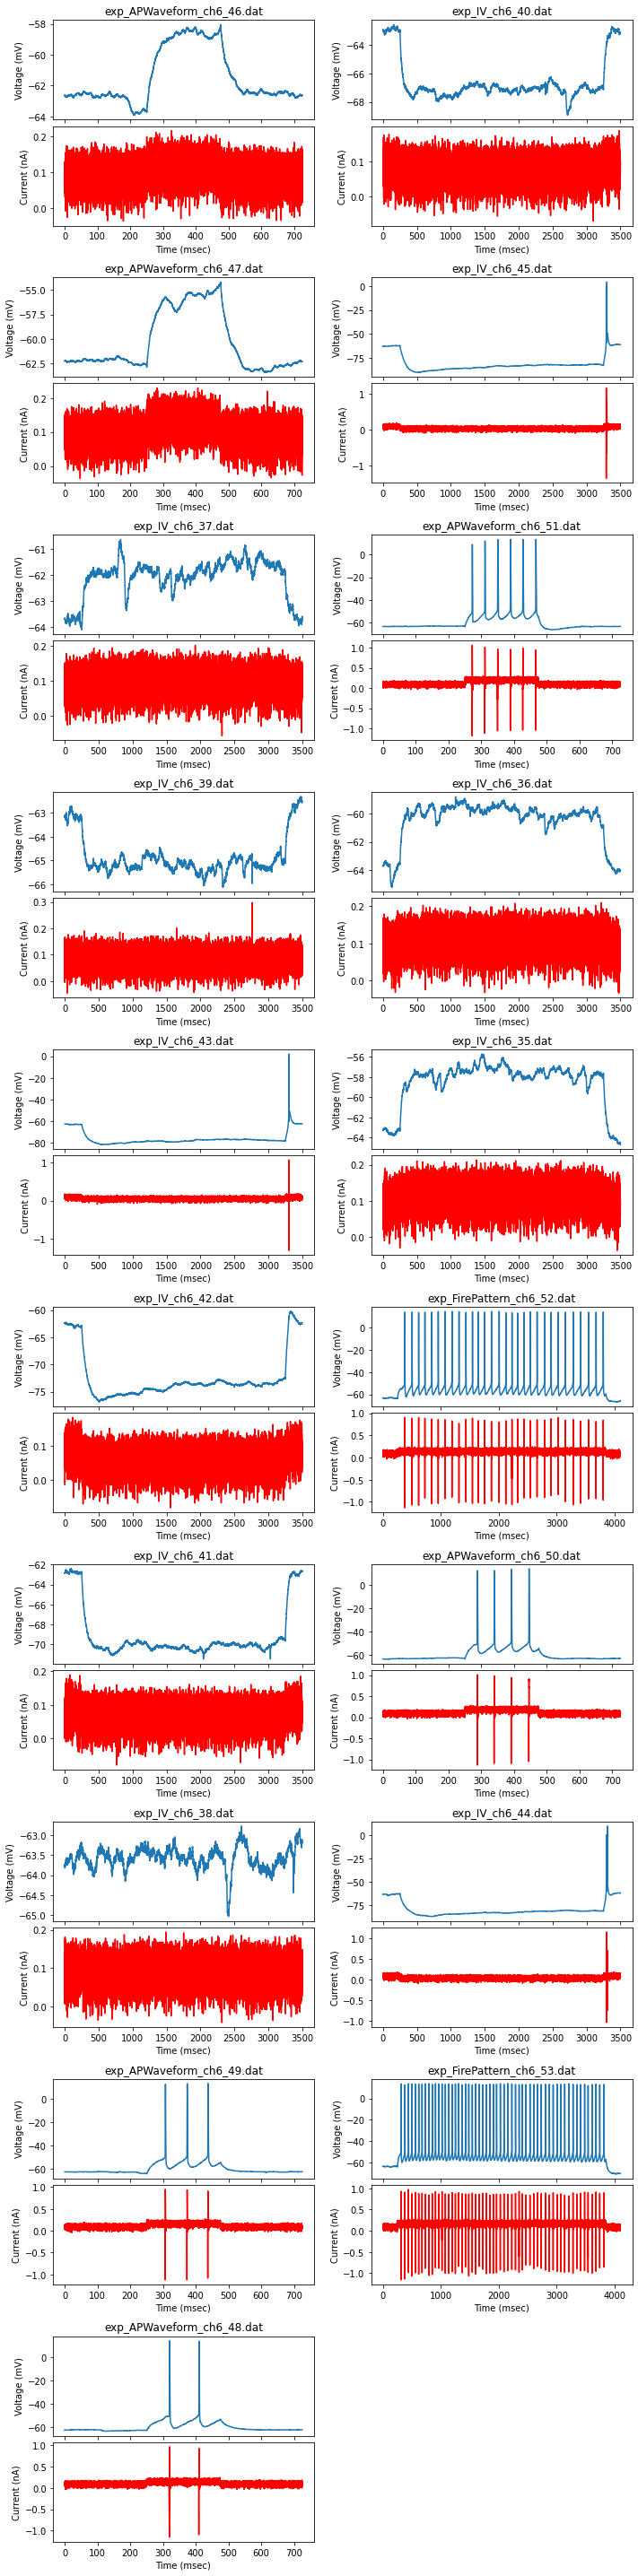

In [74]:
#Plot all traces
fig = plt.figure(figsize=(10, 40))
plot_traces(fig, paired_traces)

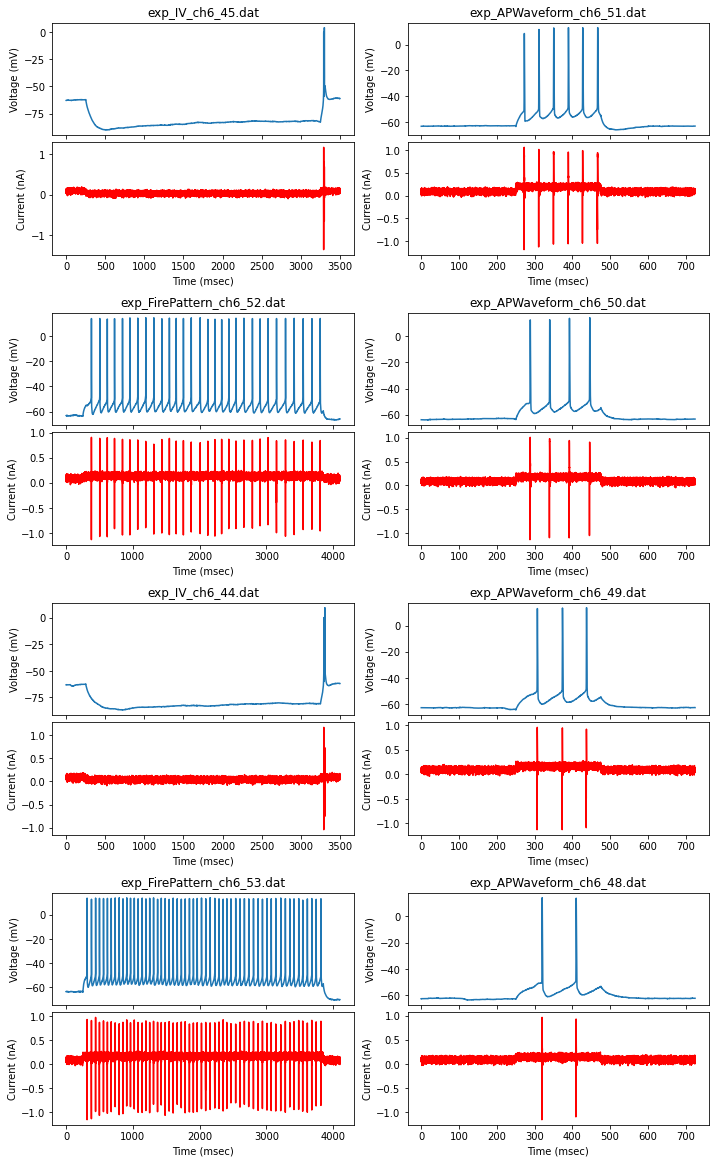

In [75]:
#Extract features from selected recordings (Recordings that have spikes [len(peaks_time) > 1])
first_peak_time, spike_counts, cv_isi, idx_selected_rec = extract_features(paired_traces)

#Plot the selected recordings with their features values
selected_traces = []
for i, trace in enumerate(paired_traces):
    if i in idx_selected_rec:
        selected_traces.append(trace)
fig = plt.figure(figsize=(10, 40))
plot_traces(fig, selected_traces)

In [76]:
#Print the features values for the selected recordings (plotted above) in tablular format.
feature_values = {}
for i, trace in enumerate(first_peak_time):
    feature_values[str(trace[0])] = {'Time of First Peak': first_peak_time[i][1],
                 'Spike Count': spike_counts[i][1],
                 'CV for ISI': cv_isi[i][1]}
IPython.display.HTML(json2html.convert(json=feature_values))